
=== Correlation of all features with Exam_Score ===
Exam_Score                    1.000000
Attendance                    0.580259
Hours_Studied                 0.445104
Previous_Scores               0.174283
Access_to_Resources           0.167856
Tutoring_Sessions             0.156829
Parental_Involvement          0.156014
Peer_Influence                0.099133
Motivation_Level              0.088502
Distance_from_Home            0.088083
Extracurricular_Activities    0.063063
Internet_Access               0.051124
Parental_Education_Level      0.040816
Physical_Activity             0.025148
School_Type                   0.010868
Gender                        0.004932
Sleep_Hours                  -0.017171
Family_Income                -0.022651
Teacher_Quality              -0.059247
Learning_Disabilities        -0.083911
Name: Exam_Score, dtype: float64


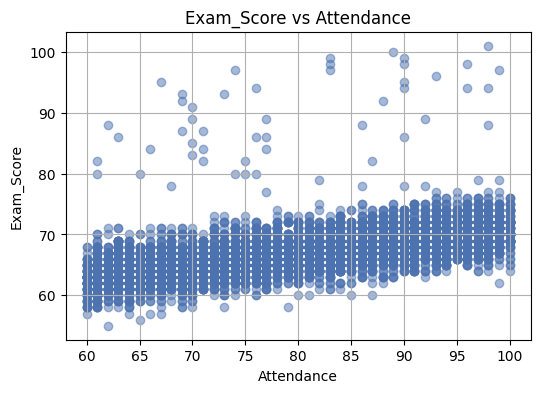

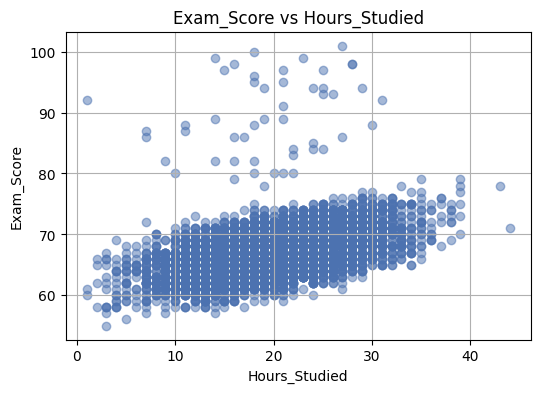

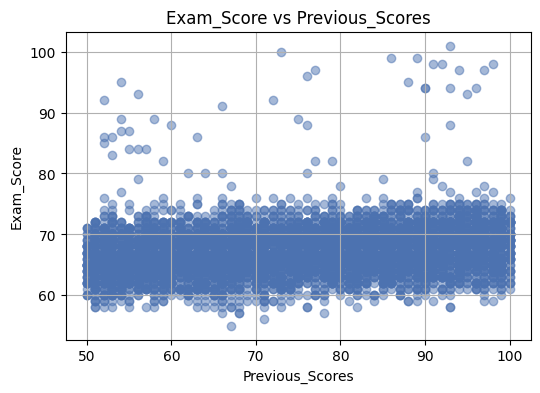

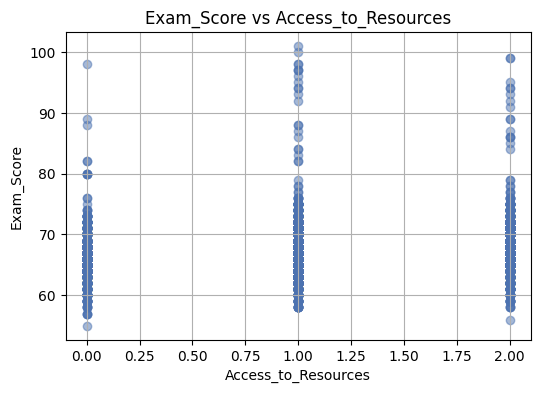

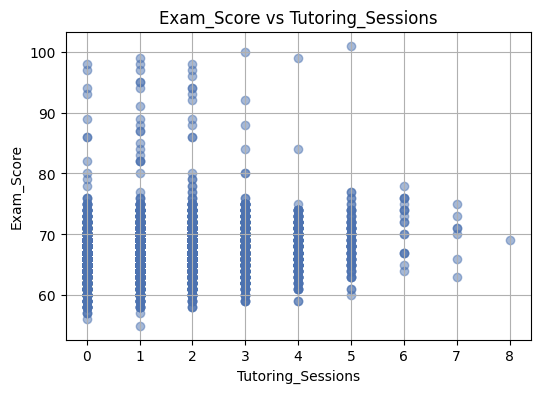

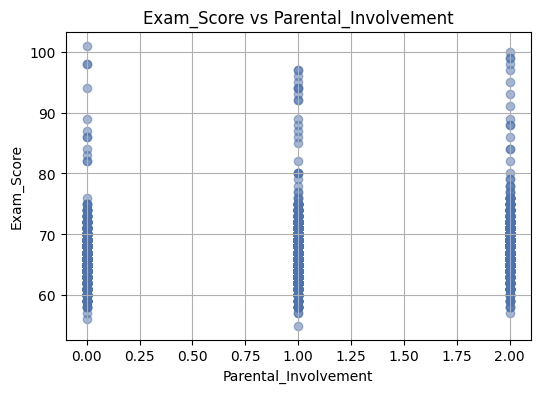

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Load dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

# كل المتغيرات
features = ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
            'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level',
            'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
            'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
            'Parental_Education_Level', 'Distance_from_Home', 'Gender']

# Drop missing values
data = df[features + ["Exam_Score"]].dropna()

# Define common ordinal mappings for 'Low', 'Medium', 'High'
ordinal_map = {"Low": 0, "Medium": 1, "High": 2}

# Encode categorical columns if needed
# Motivation_Level
if data["Motivation_Level"].dtype == "object":
    data["Motivation_Level"] = data["Motivation_Level"].map(ordinal_map)

# Attendance
if data["Attendance"].dtype == "object":
    data["Attendance"] = data["Attendance"].map(ordinal_map)

# Parental_Involvement
if data["Parental_Involvement"].dtype == "object":
    data["Parental_Involvement"] = data["Parental_Involvement"].map(ordinal_map)

# Access_to_Resources
if data["Access_to_Resources"].dtype == "object":
    data["Access_to_Resources"] = data["Access_to_Resources"].map(ordinal_map)

# Gender
if data["Gender"].dtype == "object":
    gender_map = {"Male":0, "Female":1}
    data["Gender"] = data["Gender"].map(gender_map)

# School_Type
if data["School_Type"].dtype == "object":
    school_map = {k:i for i,k in enumerate(data["School_Type"].unique())}
    data["School_Type"] = data["School_Type"].map(school_map)

# General Label Encoding for any remaining object columns
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# ==========================
# 1) Correlation with Exam_Score
# ==========================
correlations = data.corr()["Exam_Score"].sort_values(ascending=False)
print("\n=== Correlation of all features with Exam_Score ===")
print(correlations)

# ==========================
# 2) Scatter Plots for top 6 predictors
# ==========================
top_features = correlations.index[1:7]  # أعلى 6 متغيرات بعد Exam_Score
for col in top_features:
    plt.figure(figsize=(6,4))
    plt.scatter(data[col], data["Exam_Score"], alpha=0.5, color="#4C72B0")
    plt.title(f"Exam_Score vs {col}")
    plt.xlabel(col)
    plt.ylabel("Exam_Score")
    plt.grid(True)
    plt.show()